In [7]:
import cv2

from PIL import Image
from SQL import getProfile
video = cv2.VideoCapture(0)

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('dataset1/training.xml')
threshold = 140
count = 0 
a = 'Unknown'
b = 0
y_test = []
while True:

    ret, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y) ,(x+w,y+h),(0,0,255),2)
        id, conf = recognizer.predict(gray[y:y+h, x:x+w])
        profile=getProfile(id)
        if conf < threshold:
            if id == profile[0]:
                y_test.append(id)
                cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
                cv2.putText(frame, "Name : "+str(profile[1]), (x,y-5),cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,127),2)
            else:
                y_test.append(b)
                cv2.putText(frame, "Name : "+str(a), (x,y-5),cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,127),2)
        else:
            y_test.append(b)
            cv2.putText(frame, "Name : "+str(a), (x,y-5),cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,127),2)
        print(conf)
    cv2.imshow('Face Recognition', frame)
    if cv2.waitKey(1) == ord('q'):
        break

video.release()
cv2.destroyAllWindows()


115.14686031731736
116.33596624018715
117.34378532400822
117.98998609979618
117.98998609979618
117.37487674526783
117.37487674526783
116.979998695462
116.979998695462
115.57585866801688
122.27666795260471
122.27666795260471
118.48026027110707
118.48026027110707
119.17596797544095
119.17596797544095
118.83539559650062
120.0768071730308
122.20842706887633
122.2681168836121
120.76436091879373
123.1150088453658
123.1150088453658
117.59119131650108
117.59119131650108
121.22424368627581
121.22424368627581
122.7556306936955
119.02364764302396
120.57752543809828
120.57752543809828
118.62510737095504
118.62510737095504
120.73684379221234
120.73684379221234
122.79936692123653
125.53887102625725
125.53887102625725
126.84574917938296
126.84574917938296
126.25489188017441
126.25489188017441
125.33902570905622
123.2425654294462
121.282969078337
121.282969078337
123.49475838156296
121.58586961661058
121.58586961661058
125.18439596703176
125.18439596703176
126.13642438534171
131.1097478864485
128.4064

In [8]:
print(y_test)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [9]:
true_name = 6
y_true = []
for i in range(len(y_test)):
    y_true.append(true_name)
print(y_true)


[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [10]:

tp = 0
fp = 0
fn = 0
for pred, truth in zip(y_test, y_true):
  if pred == truth:
      tp += 1
  else:
      if pred != 0:
        fp += 1
      else:
        fn += 1

precision = tp / (tp + fp) 
recall = tp / (tp + fn) 

f1_score = 2 * (precision * recall) / (precision + recall) 
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1_score)

Precision:  0.8888888888888888
Recall:  1.0
F1 Score:  0.9411764705882353


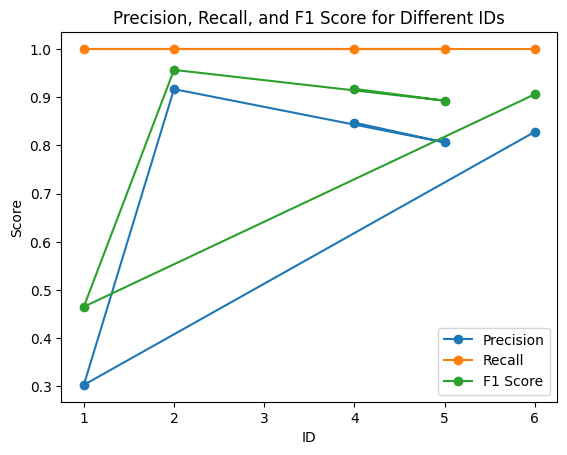

In [11]:
import matplotlib.pyplot as plt

data = {
    6: {'Precision': 0.8279569892473119, 'Recall': 1.0, 'F1 Score': 0.9058823529411765},
    1: {'Precision': 0.3032258064516129, 'Recall': 1.0, 'F1 Score': 0.4653465346534653},
    2: {'Precision': 0.9166666666666666, 'Recall': 1.0, 'F1 Score': 0.9565217391304348},
    5: {'Precision': 0.8062015503875969, 'Recall': 1.0, 'F1 Score': 0.8927038626609441},
    4: {'Precision': 0.8471337579617835, 'Recall': 1.0, 'F1 Score': 0.9172413793103449},
}

ids = list(data.keys())
precision = [data[id]['Precision'] for id in ids]
recall = [data[id]['Recall'] for id in ids]
f1_score = [data[id]['F1 Score'] for id in ids]

fig, ax = plt.subplots()

ax.plot(ids, precision, label='Precision', marker='o')
ax.plot(ids, recall, label='Recall', marker='o')
ax.plot(ids, f1_score, label='F1 Score', marker='o')

ax.set_xlabel('ID')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score for Different IDs')
ax.legend()

plt.show()


In [12]:
average_precision = sum(precision) / len(precision)
average_recall = sum(recall) / len(recall)
average_f1_score = sum(f1_score) / len(f1_score)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1_score)

Average Precision: 0.7402369541429944
Average Recall: 1.0
Average F1 Score: 0.8275391737392731
